Guernsey traffic injuries
=============

In [1]:
import requests
json_data = requests.get('http://data.gg/api/1.0/traffic/injuries.json').text
json_data[:200]

u'[{"Year":2005,"Type":"Adult Pedal Cycle","Fatal":0,"Serious":2},{"Year":2005,"Type":"Adult Pedestrian","Fatal":0,"Serious":3},{"Year":2005,"Type":"Drivers","Fatal":1,"Serious":11},{"Year":2005,"Type":'

In [2]:
import pandas
df = pandas.read_json(json_data)
df.set_index('Year', inplace=True)
df.head()

,Fatal,Serious,Type
Year,,,
2005,0,2,Adult Pedal Cycle
2005,0,3,Adult Pedestrian
2005,1,11,Drivers
2005,0,0,Juvenile Pedal Cycle
2005,0,2,Juvenile Pedestrian


In [3]:
df['Total'] = df['Fatal'] + df['Serious']
df.head()

,Fatal,Serious,Type,Total
Year,,,,
2005,0,2,Adult Pedal Cycle,2
2005,0,3,Adult Pedestrian,3
2005,1,11,Drivers,12
2005,0,0,Juvenile Pedal Cycle,0
2005,0,2,Juvenile Pedestrian,2


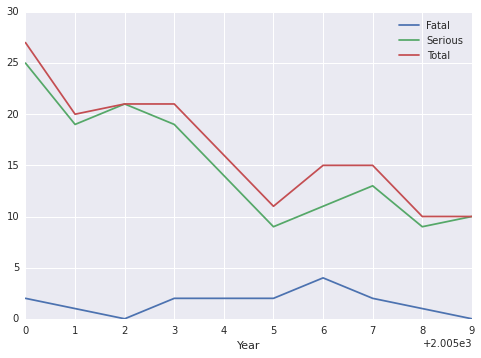

In [4]:
%matplotlib inline
import seaborn

df_summary = df.reset_index().groupby('Year').aggregate(sum)
df_summary.plot()

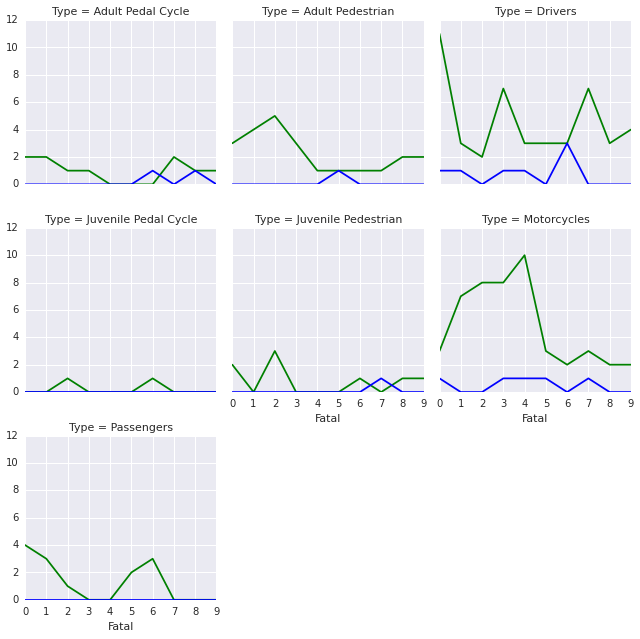

In [5]:
import matplotlib.pyplot as plt

grid = seaborn.FacetGrid(df, col='Type', col_wrap=3)
grid.map(plt.plot, 'Serious', color='green')
grid.map(plt.plot, 'Fatal', color='blue')
